# Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

spotify = pd.read_csv(
    "/Users/clarissaache/Documents/IDS 705 ML/ml-project/00 raw data/spotify_songs.csv"
)
spotify.head()

music_covariates = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

other_covariates = ['track_album_name', 'track_name', 'track_artist']

music = spotify[music_covariates] #subset for music covariates only
music_X = spotify[music_covariates]
music_Y = spotify['playlist_genre']

In [6]:
from sklearn.model_selection import train_test_split

X_clust, X_class, y_clust, y_class = train_test_split(
    music_X, music_Y, test_size=0.5, random_state=42
)

X_class.to_csv('/Users/clarissaache/Documents/IDS 705 ML/ml-project/20 classification/X_class')
y_class.to_csv('/Users/clarissaache/Documents/IDS 705 ML/ml-project/20 classification/y_class')

### Clustering Method #1: K-means (simple)
* We first did an elbow search to find the number of clusters that minimized the wcss (within cluster sum of squares error) adn we got that optimal number is 4. However, if we want to compare to spotify's classes we may want to do 6.
... still did it just to see :)

Eval Metrics:
- **PURITY:** In general, purity increases as the number of clusters increases. For instance, if we have a model that groups each observation in a separate cluster, the purity becomes one. For this very reason, purity cannot be used as a trade off between the number of clusters and clustering quality.
- **NMI:** NMI tells us how much the uncertainty about class labels decreases when we know the cluster labels. One advantage of NMI is that we can use it to compare different clustering models that have different number of clusters because NMI is normalized.
- **Rand Index:** Rand index is a measure of similarity between two clusterings. The rand_score function of scikit-learn can be used to calculate rand index. We can use it to compare actual class labels (spotify) and predicted cluster labels (ours) to evaluate the performance of a clustering algorithm.



Optimal number of clusters 4


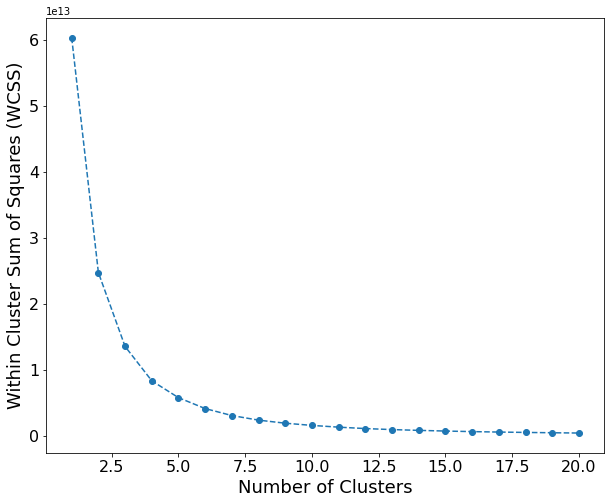

In [7]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

wcss = [] # get within cluster sum of squares for each value of k
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(X_clust)
    wcss.append(kmeans_pca.inertia_)
      
# programmatically locate the elbow
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)
    
# visualize the curve in order to locate the elbow
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [9]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(X_clust)
labs_1 = kmeans_pca.labels_